In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import rioxarray as rxr
from rasterio.plot import plotting_extent
import geopandas as gpd
import rasterstats as rs
from earthpy import spatial as es
import earthpy as et
import earthpy.plot as ep

In [2]:
sns.set_style("white")
sns.axes_style("white")
sns.set(font_scale=1.5)

data=et.data.get_data("spatial-vector-lidar")
os.chdir(os.path.join(et.io.HOME,"earth-analytics", "data"))

In [3]:
sjer_lidar_chm_path = os.path.join("spatial-vector-lidar", "california", "neon-sjer-site", "2013", "lidar", "SJER_lidarCHM.tif")

sjer_chm_data = rxr.open_rasterio(sjer_lidar_chm_path, masked=True).squeeze()

plot_buffer_path = os.path.join("spatial-vector-lidar", "outputs", "plot_buffer.shp")

sjer_tree_heights = rs.zonal_stats(plot_buffer_path,sjer_chm_data.values,affine=sjer_chm_data.rio.transform(),geojson_out=True,copy_properties=True,
    nodata=0,stats="count mean max")

sjer_lidar_height_df = gpd.GeoDataFrame.from_features(sjer_tree_heights)

In [4]:
path_insitu = os.path.join("spatial-vector-lidar","california","neon-sjer-site","2013","insitu","veg_structure","D17_2013_SJER_vegStr.csv")

sjer_insitu_all = pd.read_csv(path_insitu)

sjer_insitu_all.columns

Index(['siteid', 'sitename', 'plotid', 'easting', 'northing', 'taxonid',
       'scientificname', 'indvidual_id', 'pointid', 'individualdistance',
       'individualazimuth', 'dbh', 'dbhheight', 'basalcanopydiam',
       'basalcanopydiam_90deg', 'maxcanopydiam', 'canopydiam_90deg',
       'stemheight', 'stemremarks', 'stemstatus', 'canopyform', 'livingcanopy',
       'inplotcanopy', 'materialsampleid', 'dbhqf', 'stemmapqf', 'plant_group',
       'common_name', 'aop_plot', 'unique_id'],
      dtype='object')

In [5]:
sjer_insitu = sjer_insitu_all[["siteid", "sitename", "plotid", "stemheight", "scientificname"]]

sjer_insitu.head()

,siteid,sitename,plotid,stemheight,scientificname
0,SJER,San Joaquin,SJER128,18.2,Pinus sabiniana
1,SJER,San Joaquin,SJER2796,3.3,Arctostaphylos viscida
2,SJER,San Joaquin,SJER272,1.7,Arctostaphylos viscida
3,SJER,San Joaquin,SJER112,2.1,Arctostaphylos viscida
4,SJER,San Joaquin,SJER272,3.0,Arctostaphylos viscida


In [6]:
insitu_stem_ht = sjer_insitu.groupby('plotid').agg(['mean', 'max'])['stemheight']

insitu_stem_ht.head()

/tmp/ipykernel_2651/3001629642.py:1: FutureWarning: ['siteid', 'sitename', 'scientificname'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  insitu_stem_ht = sjer_insitu.groupby('plotid').agg(['mean', 'max'])['stemheight']


,mean,max
plotid,,
SJER1068,3.866667,19.3
SJER112,8.221429,23.9
SJER116,8.218750,16.0
SJER117,6.512500,11.0
SJER120,7.600000,8.8


In [7]:
insitu_stem_ht.head()

,mean,max
plotid,,
SJER1068,3.866667,19.3
SJER112,8.221429,23.9
SJER116,8.218750,16.0
SJER117,6.512500,11.0
SJER120,7.600000,8.8


In [8]:
insitu_stem_ht.rename(columns={"mean": "insitu_mean", "max": "insitu_max"}, inplace=True)
insitu_stem_ht.head()

,insitu_mean,insitu_max
plotid,,
SJER1068,3.866667,19.3
SJER112,8.221429,23.9
SJER116,8.218750,16.0
SJER117,6.512500,11.0
SJER120,7.600000,8.8


In [9]:
insitu_stem_ht.head()

,insitu_mean,insitu_max
plotid,,
SJER1068,3.866667,19.3
SJER112,8.221429,23.9
SJER116,8.218750,16.0
SJER117,6.512500,11.0
SJER120,7.600000,8.8


In [10]:
insitu_stem_ht.rename(columns={"mean": "insitu_mean","max": "insitu_max"},inplace=True)  

insitu_stem_ht.head()

,insitu_mean,insitu_max
plotid,,
SJER1068,3.866667,19.3
SJER112,8.221429,23.9
SJER116,8.218750,16.0
SJER117,6.512500,11.0
SJER120,7.600000,8.8


In [11]:
insitu_stem_ht = insitu_stem_ht.reset_index()
insitu_stem_ht.head()

,plotid,insitu_mean,insitu_max
0,SJER1068,3.866667,19.3
1,SJER112,8.221429,23.9
2,SJER116,8.218750,16.0
3,SJER117,6.512500,11.0
4,SJER120,7.600000,8.8


In [12]:
sjer_lidar_height_df = sjer_lidar_height_df.rename(columns={"max": "lidar_max","mean": "lidar_mean","min": "lidar_min"})

sjer_final_height = sjer_lidar_height_df.merge(insitu_stem_ht,left_on="Plot_ID",right_on="plotid")
sjer_final_height.head()

,geometry,Plot_ID,Point,northing,easting,plot_type,lidar_max,lidar_mean,count,plotid,insitu_mean,insitu_max
0,"POLYGON ((255872.376 4111567.818, 255872.280 4...",SJER1068,center,4111567.818,255852.376,trees,19.049999,11.544347,161,SJER1068,3.866667,19.3
1,"POLYGON ((257426.967 4111298.971, 257426.871 4...",SJER112,center,4111298.971,257406.967,trees,24.019999,10.369277,443,SJER112,8.221429,23.9
2,"POLYGON ((256858.760 4110819.876, 256858.664 4...",SJER116,center,4110819.876,256838.760,grass,16.070000,7.518398,643,SJER116,8.218750,16.0
3,"POLYGON ((256196.947 4108752.026, 256196.851 4...",SJER117,center,4108752.026,256176.947,trees,11.059999,7.675346,245,SJER117,6.512500,11.0
4,"POLYGON ((255988.372 4110476.079, 255988.276 4...",SJER120,center,4110476.079,255968.372,grass,5.740000,4.591177,17,SJER120,7.600000,8.8


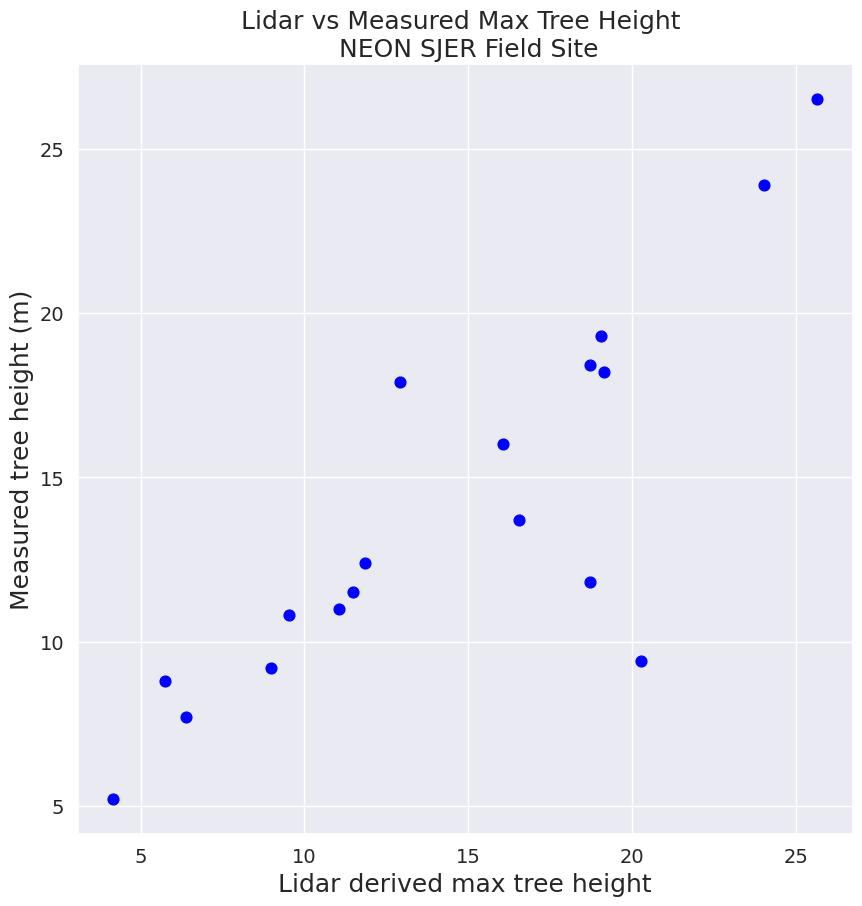

In [13]:
sjer_final_height_df = pd.DataFrame(sjer_final_height)

fig, ax = plt.subplots(figsize=(10, 10))

sjer_final_height_df.plot('lidar_max','insitu_max',kind='scatter',fontsize=14, s=60,color="blue",ax=ax)

ax.set(xlabel="Lidar derived max tree height",
       ylabel="Measured tree height (m)",
       title="Lidar vs Measured Max Tree Height \n NEON SJER Field Site")

plt.show()

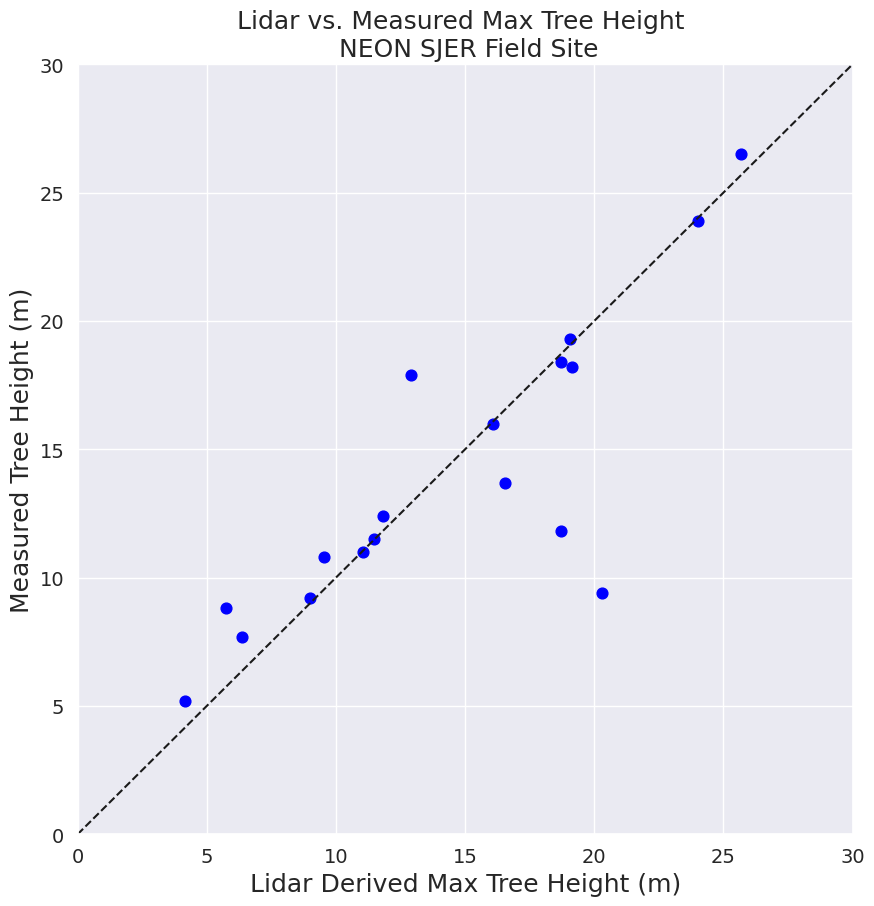

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))

sjer_final_height_df.plot('lidar_max','insitu_max',kind='scatter',fontsize=14,color="blue",s=60, ax=ax)

ax.set(xlabel="Lidar Derived Max Tree Height (m)",
       ylabel="Measured Tree Height (m)",
       title="Lidar vs. Measured Max Tree Height \n NEON SJER Field Site")

ax.plot((0, 1), (0, 1),
        transform=ax.transAxes, ls='--', c='k')

ax.set(xlim=[0, 30], ylim=[0, 30])
plt.show()

In [15]:
outpath = os.path.join("spatial-vector-lidar", "outputs", "sjer-lidar-insitu-merge.csv")

sjer_final_height_df.to_csv(outpath)

In [16]:
sjer_final_height['geometry'] = sjer_final_height.centroid
sjer_final_height.head()

sjer_final_height['insitu_max']

0     19.3
1     23.9
2     16.0
3     11.0
4      8.8
5     18.2
6     13.7
7     12.4
8      9.4
9     17.9
10     9.2
11    11.8
12    11.5
13    10.8
14     5.2
15    26.5
16    18.4
17     7.7
Name: insitu_max, dtype: float64

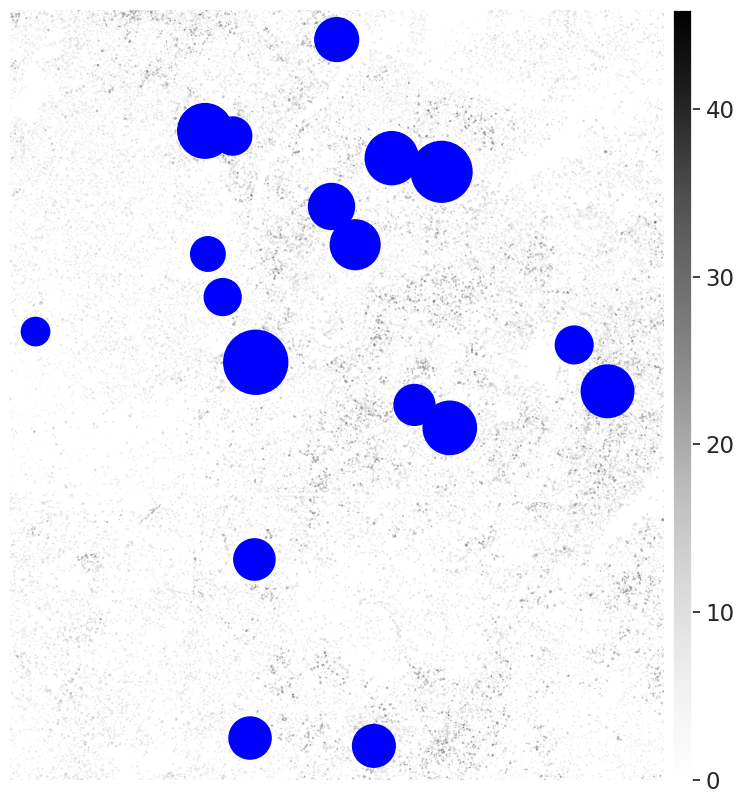

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
ep.plot_bands(sjer_chm_data,cmap='Greys',extent=plotting_extent(sjer_chm_data,sjer_chm_data.rio.transform()),ax=ax,scale=False)

sjer_final_height.centroid.plot(ax=ax, marker='o', markersize=sjer_final_height['insitu_max'] * 80, c='blue')
ax.set_axis_off()
plt.show()